In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df = df.drop_duplicates()

In [4]:
print(df.describe())
print(df.info())

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

In [5]:
subSet1 = df[['age','cp','chol','thal']]
subSet2 = df[['exang','slope','target']]
merged_df = subSet1.merge(right=subSet2, how='cross')

In [7]:

def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

for col in ['cp','thal','exang','oldpeak','slope','ca']:
    df[col] = remove_outliers(df[col])

In [8]:
df = df.dropna()
df = df.drop('fbs', axis=1)

In [9]:
x = df[['cp','thal','exang','oldpeak','slope','ca']]
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [12]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train.ravel())
y_pred = model.predict(x_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8181818181818182


In [13]:
tc = DecisionTreeClassifier(criterion='entropy')
tc.fit(x_train_scaled, y_train)
y_pred_tree = tc.predict(x_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_pred_tree, y_test))
print("Confusion Matrix:", confusion_matrix(y_pred_tree, y_test))

Decision Tree Accuracy: 0.7272727272727273
Confusion Matrix: [[21  6]
 [ 9 19]]


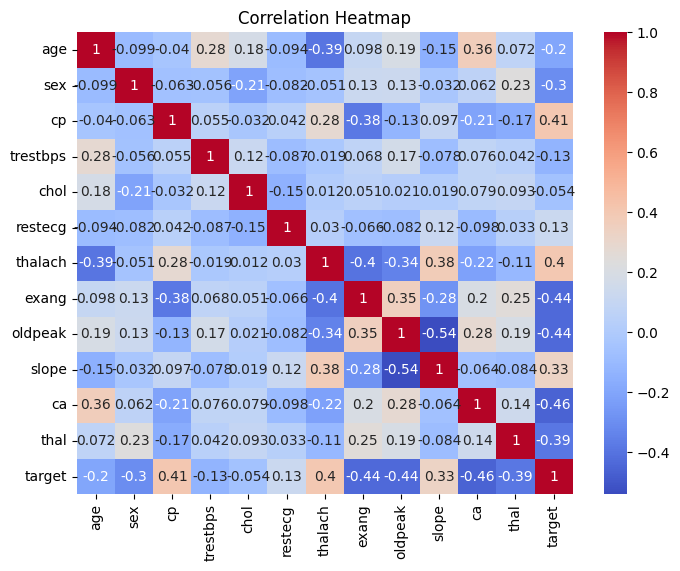

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

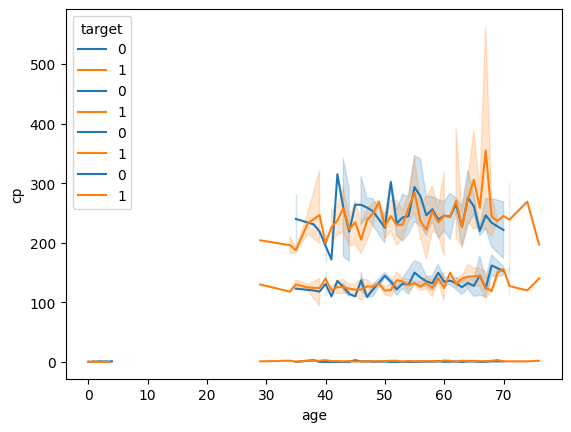

In [15]:
sns.lineplot(data=df, x="age", y="cp", hue="target")
sns.lineplot(data=df, x="age", y="trestbps", hue="target")
sns.lineplot(data=df, x="age", y="chol", hue="target")
sns.lineplot(data=df, x="oldpeak", y="exang", hue="target")
plt.show()


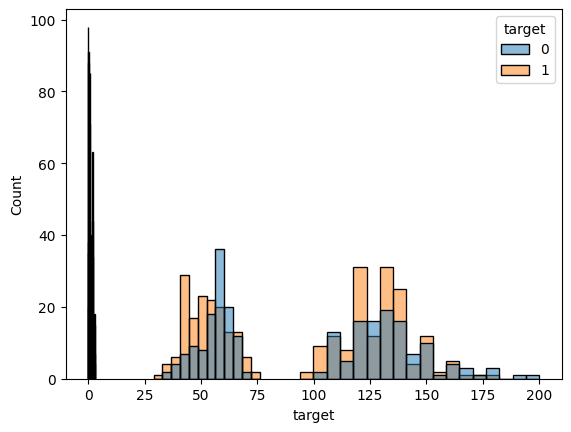

In [16]:
sns.histplot(data=df, x="target", hue="sex")
sns.histplot(data=df, x="cp", hue="sex")
sns.histplot(data=df, x="cp", hue="target")
sns.histplot(data=df, x="age", hue="target")
sns.histplot(data=df, x="trestbps", hue="target")
plt.show()